# 1. Logistic Regression for AND and XOR

# AND

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [81]:
# AND
ANDinput = np.asarray([[0,0],[0,1],[1,0],[1,1]])
ANDoutput = np.asarray([[0],[0],[0],[1]])

In [82]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1]) 

In [83]:
# Initialize weights

W= tf.Variable(tf.random_uniform([2,1], -1, 1), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

predict = tf.nn.sigmoid(tf.matmul(x,W)+b)

In [84]:
# Loss function
loss = tf.reduce_mean(tf.reduce_sum((y-predict)**2))

In [85]:
learning_rate = 0.01
epochs = 5000
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [86]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [87]:
sess.run(init)
for i in range(epochs):
  sess.run(optimizer, feed_dict={x: ANDinput, y: ANDoutput})

In [88]:
print("Predict: ", sess.run(predict, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W, feed_dict={x: ANDinput, y: ANDoutput}))

('Predict: ', array([[ 0.34233156]], dtype=float32))
[[ 2.63875246]
 [ 2.63873315]]


In [89]:
correct_prediction = tf.equal(tf.round(predict),y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: ANDinput, y: ANDoutput}))

1.0


In [90]:
w=[sess.run(b, feed_dict={x: ANDinput, y: ANDoutput})[0]]+[i[0] for i in sess.run(W, feed_dict={x: ANDinput, y: ANDoutput})]

In [91]:
w0 = w[0]
w1 = w[1]
w2 = w[2]

print w0, w1, w2

-4.08329 2.63875 2.63873


In [92]:
diffX = (-w0 / w1 - 0)
diffY = (0 - (-w0 / w2))
gradient = (diffY)/(diffX) 
print gradient

-1.0000073185


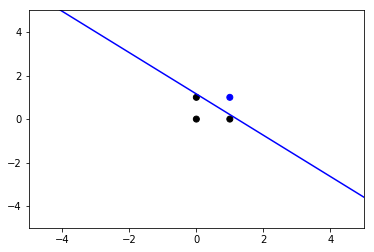

In [126]:
plt.scatter(ANDinput[:,0],ANDinput[:,1],color=['blue' if i==1 else 'black' for i in ANDoutput])
randompoints = np.linspace(-10,10,10) # 100 numeros espaciados
plt.plot(randompoints,-w[0]/w[2] + gradient*randompoints ,color='blue')
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

# XOR

In [94]:
# XOR
XORinput = np.asarray([[0,0],[0,1],[1,0],[1,1]])
XORoutput = np.asarray([[0],[1],[1],[0]])

In [95]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1]) 

In [96]:
# Initialize weights

W= tf.Variable(tf.random_uniform([2,1], -1, 1), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

predict = tf.nn.sigmoid(tf.matmul(x,W)+b)

In [97]:
# Loss function
loss = tf.reduce_mean(tf.reduce_sum((y-predict)**2))

In [98]:
learning_rate = 0.01
epochs = 5000
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [99]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [100]:
sess.run(init)
for i in range(epochs):
  sess.run(optimizer, feed_dict={x: XORinput, y: XORoutput})

In [101]:
print("Predict: ", sess.run(predict, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W, feed_dict={x: XORinput, y: XORoutput}))

('Predict: ', array([[ 0.4999668]], dtype=float32))
[[-0.00122402]
 [-0.00129025]]


In [102]:
correct_prediction = tf.equal(tf.round(predict),y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: XORinput, y: XORoutput}))

0.75


In [103]:
w=[sess.run(b, feed_dict={x: XORinput, y: XORoutput})[0]]+[i[0] for i in sess.run(W, feed_dict={x: XORinput, y: XORoutput})]

In [104]:
w0 = w[0]
w1 = w[1]
w2 = w[2]

print w0, w1, w2

0.00149157 -0.00122402 -0.00129025


In [105]:
diffX = (-w0 / w1 - 0)
diffY = (0 - (-w0 / w2))
gradient = (diffY)/(diffX) 
print gradient

-0.94866873973


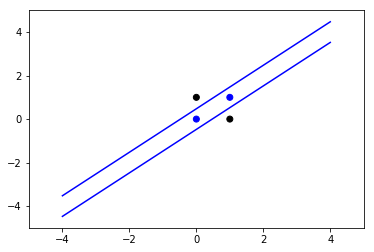

In [125]:
boundary = np.linspace(-4,4,10)
plt.plot(boundary,boundary - gradient/2,c='blue')
plt.plot(boundary,boundary + gradient/2,c='blue')
plt.scatter(XORinput[:,0],XORinput[:,1],color=['black' if i==1 else 'blue' for i in XORoutput])
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

# 2. ANN for XOR

In [131]:
#XOR
XORinput = np.asarray([[0,0],[0,1],[1,0],[1,1]])
XORoutput = np.asarray([[0],[1],[1],[0]])

In [132]:
inputlayer = tf.placeholder(tf.float32, shape=[4,2])
inputweights = tf.Variable(tf.random_uniform([2,2], -1, 1))
inputbias = tf.Variable(tf.zeros([2]))

outputlayer = tf.placeholder(tf.float32, shape=[4,1])
outputweights = tf.Variable(tf.random_uniform([2,1], -1, 1))
outputbias = tf.Variable(tf.zeros([1]))


In [135]:
hiddenlayer = tf.sigmoid(tf.matmul(inputlayer, inputweights) + inputbias)
outputformula = tf.sigmoid(tf.matmul(hiddenlayer, outputweights) + outputbias)

In [136]:
loss = tf.reduce_mean(((outputlayer * tf.log(outputformula)) +((1 - outputlayer) * tf.log(1.0 - outputformula)) ) * -1)

In [163]:
learning_rate = 0.03

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

epochs = 1000

for i in range(epochs):
    sess.run(train_step, feed_dict={inputlayer: XORinput, outputlayer: XORoutput})
    
#print('Input Weight:', sess.run(inputweights))
#print('Input Bias: ', sess.run(inputbias))
#print('Output Weight: ', sess.run(outputweights))
#print('Output Bias: ', sess.run(outputbias))

w0 = sess.run(outputbias[0])
w1 = sess.run(outputweights[0][0])
w2 = sess.run(outputweights[1][0])

print w0, w1, w2


0.145168 -0.616171 0.454441


In [166]:
diffX = (-w0 / w1 - 0)
diffY = (0 - (-w0 / w2))
gradient = (diffY)/(diffX) 
print gradient

1.35588831747


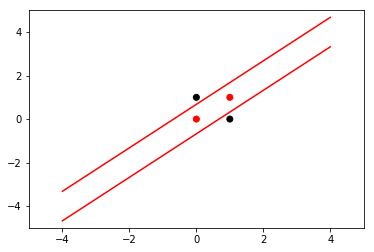

In [170]:
x = np.asarray(XORinput)[:,0]
y = np.asarray(XORinput)[:,1]

boundary = np.linspace(-4,4,10)
plt.plot(boundary,boundary - gradient/2,c='red')
plt.plot(boundary,boundary + gradient/2,c='red')
plt.scatter(x, y, color=["black" if i==1 else "red" for i in XORoutput])
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

# 3. ANN for circle data

In [153]:
import matplotlib.patches as patches
import matplotlib.path as path
import math

#Generate random points
numberOfPoints = 10000
randompoints = np.random.rand(numberOfPoints,2)*2
xcor = randompoints[:,0]
ycor = randompoints[:,1]
#Create circle parameter
radius = 0.5
centre = (1,1)

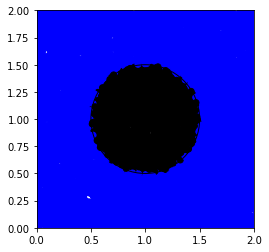

In [155]:
upperlimit = centre[0] + radius
lowerlimit = centre[0] - radius

circledatainput = np.zeros(shape=(len(xcor),2))
circledataoutput = np.zeros(shape=(len(xcor),1))

for i,j,count in zip(xcor,ycor, range(len(xcor))):
    dist = math.sqrt((centre[0] - i) ** 2 + (centre[1] - j) ** 2)
    circledatainput[count] = i,j
    if (dist<=radius):
        circledataoutput[count] = 1
    else:
        circledataoutput[count] = 0

circledatainput = np.asarray(circledatainput)
circledataoutput = np.asarray(circledataoutput)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Circle(centre, radius, fill= False))
plt.ylim([0,2])
plt.xlim([0,2])
plt.scatter(circledatainput[:,0],circledatainput[:,1],color=['black' if i==1 else 'blue' for i in circledataoutput])
plt.show()

In [162]:
input_size=2
hidden_layers=4
middle_layer=4
output_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y = tf.placeholder(tf.float32,shape=[None,output_size])

In [163]:
W1 = tf.Variable(tf.random_uniform([input_size,middle_layer], -1, 1), name="W1")
b1 = tf.Variable(tf.zeros([middle_layer]), name="b1")

In [164]:
W2 = tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1), name="W2")
b2 = tf.Variable(tf.zeros([output_size]), name="b2")

In [165]:
hidden_1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
predict = tf.nn.sigmoid(tf.matmul(hidden_1,W2)+b2)
loss = tf.reduce_mean(( (y * tf.log(predict) + ((1 - y) * tf.log(1.0 - predict)) ) * -1))

learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [166]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [177]:
epochs = 1000

for i in range(epochs):
    sess.run(train_step, feed_dict={x: circledatainput, y: circledataoutput})

In [176]:
correct_prediction = tf.equal(tf.round(predict),y) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: circledatainput, y: circledataoutput}))

0.803


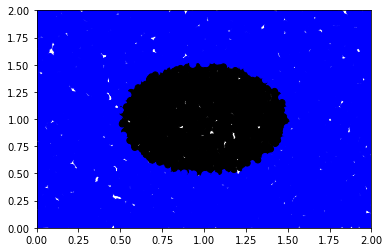

In [175]:
prediction = sess.run(predict,feed_dict={x:circledatainput})
plt.scatter(circledatainput[:,0],circledatainput[:,1],color=['black' if i==1 else 'blue' for i in circledataoutput])
plt.ylim([0,2])
plt.xlim([0,2])
plt.show()